## Phys 513: Homework 02
**Exercise 5.3**: Consider the integral 

$$ E(x) = \int_0^x e^{-t^2} dt $$

1. Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1. Choose for yourself what method you will use for performing the integral and a suitable number of slices

2. When you are convinced your program is working, extend it further to make a graph of $E(x)$ as a function of x. If you want to remind yourself of how to make a graph, you should consult section 3.1, starting on page 88.



E(3) =  1444.554263384026


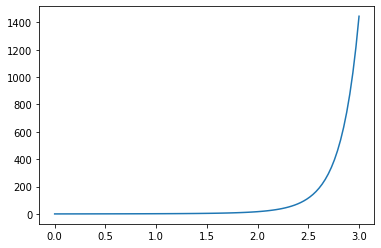

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function
def f(t):
    return np.exp(np.square(-t))


N = 100 # Number of divisions
a = 0.0 # Initial value
b = 3.0 # Final Value
h = (b-a)/N


## Simpson's Rule ##
def Simp(f,N,a,b):  
# f . . . Function
# N . . . Number of divisions
# [a,b] . . . Integration Interval
    if N % 2 == 1: # Check for even number of slices
         return("There are not an even number of divisions Simpson's rule can not be implemented")
    h = (b-a)/N
    
    S = f(a) + f(b)
    for k in range(1,N,2):#For odd terms
        S += 4*f(a+k*h)
    for k in range(2,N,2):#For even terms
        S += 2*f(a+k*h)
    return(h*S/3)

##----- Part 1 -----##
print("E(3) = ",Simp(f,N,a,b))
##----- Part 2 -----##
x = np.linspace(a,b,N)
E = Simp(f,N,a,x)

plt.plot(x,E)

**Exercise 5.5: Error on Simpson's rule**

Following the same line of argument that led to eq. (5.28), show that the error on an integral evaluated using Simpson's rule is given, to leading order in *h*, by Eq. (5.29).

**Exercise 5.6**: Write a program, or modify an earlier one, to once more calculate the value of the integral $\int_0^2 (x^4 - 2x +1) dx$ from example 5.1, using the trapezoidal rule with 20 slices, but this time have the program also print an estimate of the error on the result, calculated using the method of Eq. (5.28). To do so you will need to evaluate the integral twice, once with $N_1 = 10$ slices and then again with $N_2 = 20$ slices. Then Eq. (5.28) gives the error. How does the error calculated in this manner compare with a direct computation of the error as the difference between your value for the integral and the true value of 4.4? Why do the two not agree perfectly?

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Function
def E(t):
    return t**4 - 2*t +1


N = 10 # Number of divisions
a = 0.0 # Initial value
b = 2.0 # Final Value
h = (b-a)/N

## Trapezoidal Rule for internal use ##
def TrapI(f,N,a,b):
# f . . . Function
# N . . . Number of divisions
# [a,b] . . . Integration Interval
    h = (b-a)/N
    T = 0.5*E(a) + 0.5*E(b) # Trapezoid rule
    
    for k in range(1,N):
        T += E(a+k*h)
    return(h*T)
    
eps = 1/3*TrapI(E,2*N,a,b) - 1/3*TrapI(E,N,a,b)
print("Error from Eq. (5.28) = ",eps)
print("True error = ",TrapI(E,2*N,a,b)-4.4)
print("The error does not agree perfectly because the error from equation 5.28 is not the actual error but the maximum error bounds.")

Error from Eq. (5.28) =  -0.026633333333333287
True error =  0.026660000000000572
The error does not agree perfectly because the error from equation 5.28 is not the actual error but the maximum error bounds.


**Exercise 5.7**: Consider the integral $$I = \int_0^1 sin^2 \sqrt{100x} dx$$
1. Write a program that uses the adaptive trapezoidal rule method of Section 5.3 and Eq. (5.34) to calculate the value of this integral to an approximate accuracy of $\epsilon = 10^{-6}$ (i.e., correct to six digits after the decimal point). Start with one single integration slice and work up from there to two, four, eight, and so forth. Have your program print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices *N*, until the target accuracy is reached. (Hint: you should find the result is around *I* = 0.45.)
2. Now modify your program to evaluate the same integral using the Romberg integration technique described in this section. Have your program print out a triangular table of values, as on page 161, of all the Romberg estimates of the integral. Calculate the error on your estimates using Eq. (5.49) and again continue the calculation until you reach an accuracy of $\epsilon = 10^{-6}$. You should find that the Romberg method reaches the required accuracy considerably faster than the trapezoidal rule alone.

In [ ]:
##----- Part 1 -----##
import numpy as np

# Function
def E(t):
    return np.sin(np.sqrt(100*t))**2
N = 2 # Number of divisions
a = 0.0 # Initial value
b = 1.0 # Final Value
h = (b-a)/N
eps = 10**(-6)

## Trapezoidal Rule for internal use ##
def TrapI(f,N,a,b):
# f . . . Function
# N . . . Number of divisions
# [a,b] . . . Integration Interval
    h = (b-a)/N
    T = 0.5*f(a) + 0.5*f(b) # Trapezoid rule
    
    for k in range(1,N):
        T += f(a+k*h)
    return(h*T)
    
I1 = 0
I2 = TrapI(E,N,a,b)
while np.abs(1/3*(I2-I1)) >= eps:
    hi = (b-a)/N
    I1 = I2
    I2 = 1/2*I1
    for k in range(1,N-1,2):
        I2 += hi*E(a+k*hi)
    N = 2*N
    print("Integral estimate is ",I2)
    print("Error is less than ",np.abs(1/3*(I2-I1)))
    print(N," divisions")

##----- Part 2 -----##
## Romberg Method ##
def Romberg(f,a,b,eps,nmax):
# f     ... function to be integrated
# [a,b] ... integration interval
# eps   ... desired accuracy
# nmax  ... maximal order of Romberg method
    Q = np.zeros((nmax,nmax),float)
    for i in range(0,nmax):
        N = 2**i
        Q[i,0] = TrapI(f,N,a,b)
        for k in range(0,i):
            n = k + 2
            Q[i,k+1] = 1.0/(4**(n-1)-1)*(4**(n-1)*Q[i,k] - Q[i-1,k])
        if (i > 0):
            if (abs(Q[i,k+1] - Q[i,k]) < eps):
               break
    print ("Romberg Method converged at",Q[i,k+1],"in",i,"steps")
    print ("Error is approximately: ",abs(Q[i,k+1]-Q[i,k]))
    # print(DataFrame(Q))
    return(Q[i,k+1])
Romberg(E,a,b,eps,10)

**Exercise 5.8**: Write a program that uses the adaptive Simpson's rule method of Section 5.3 and Eqs. (5.35) to (5.39) to calculate the same integral as in Exercise 5.7, again to an approximate accuracy of $\epsilon = 10^{-6}$. Starting this time with two integration slices, work up from there to four, eight, and so forth, printing out the results at each step until the required accuracy is reached. You should find you reach that accuracy for a significantly smaller number of slices than with the trapezoidal rule calculation in part (a) of Exercise 5.7, but a somewhat larger number than with the Romberg integration of part (b).

**Exercise 5.9: Heat capacity of a solid**

Debye's theory of solids gives the heat capacity of a silid at temperature *T* to be 

$$ C_V = 9 V \rho k_B (T/\theta_D)^3 \int_0^{\theta_{D/T}} \frac{x^4 e^x}{(e^x-1)^2}dx $$

where V is the volume of the solid, $\rho$ is the number density of atoms, $k_B$ is Boltzmann's constant, and $\theta_D$ is the so called *Debye temperature*, a property of solids that depends on their density and speed of sound.

1. Write a Python function $C_V(T)$ that calculates $C_V$ for a given value of the temperature, for a sample consisting of 1000 cubic centimeters of solid aluminum, which has a number consisting of 1000 cubic centimeters of silid aluminum, which has a number density of $\rho = \times{6.022}{10^28} m^{-3}$ and a Debye temperature of $\theta_D$ = 428K. Use Gaussian quadrature to evaluate the integral, with N = 50 sample points.

2. Use your function to make a graph of the heat capacity as a function of temperature from *T* = 5 K to *T* = 500 K

**Exercise 5.10**: The simple harmonic oscillator crops up in many places. Its behavior can be studied readily using analytic methods and it has the important property that its period of oscillation is a constant, independant of its amplitude, making it useful, for instance, for keeping time in watches and clocks.

Frequently in physics, however, we also come across anharmonic oscillators, whose period varies with amplitude and whose behavior cannot usually be calculated analytically. A general classical oscillator can be thought of as a particle in a concave potential well. When disturbed, the particle will rock back and forth in the well.

The harmonic oscillator corresponds to a quadratic potential $V(x) \propto x^2$. Any other form gives an anharmonic oscillator. (This there are many different kinds of anharmonic oscillator, depending on the exact form of the potential.)

One way to calculate the motion of an oscillator is to write down the equation for the conservation of energy in the system. If the particle has mass *m* and position x, then the total energy is equal to the sum of the kinetic and potential energies thus:
    
$$E = \frac{1}{2} m {(\frac{dx}{dt})}^2+V(x)$$

Since the energy must be constant over time, this equation is effectively a (nonlinear) differential equation linking x and t.

Let us assume that the potential *V(x)* is symmetric about x = 0 and let us set our anharmonic oscillator going with amplitude *a*. That is, at t = 0 we release it from rest at position x = a and it swings back towards the origin. Then at t = 0 we have dx/dt = 0 and the equation above reads E = V(a), which gives us the total energy of the particle in terms of the amplitude.

1. When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. By rearranging the equation above for dx/dt and then integrating with respect to t from 0 to T/4, show that the period T is given by 
        
$$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}} $$

2. Suppose the potential is $V(x) = x^4$ and the mass of the particle is m = 1. Write a python function that calculates the period of the oscillator for a given amplitude a using Gaussian quadrature with N = 20 points, then use your function to make a graph of the period for amplitudes ranging from a = 0 to a = 2.

3. You should find that the oscillator gets faster as the amplitdue increases, even though the particle has further to travel for larger amplitude. And you should find that the period diverges as the amplitude goes to zero. How do you explain these results?
    

**Exercise 5.12: The Stefan-Boltzmann constant**

The Planck theory of thermal radiation tells us that in the (angular) frequency interval $\omega$ to $\omega + d\omega$, a black body of unit area radiates electromagnetically an amount of thermal energy per second equal to $I(\omega)d\omega$, where

$$ I(\omega) = \frac{\hbar}{4\pi^2c^2} \frac{\omega^3}{(e^{{\hbar\omega}/{k_B T}}-1)} $$

Here $\hbar$ is Planck's constant over $2\pi$, c is the speed of light, and $k_B$ is Boltzmann's constant.

1. Show that the total rate at which energy is raduated by a black body per unit area over all frequencies, is $$W = \frac{k_B^4T^4}{4\pi^2c^2\hbar^3} \int_0^{\infty} \frac{x^3}{e^x-1} dx $$

2. Write a program to evaluate the integral in this expression. Explain what method you used, and how accurate you think your answer is.

3. Even before Planck gave his theory of thermal radiation around the turn of the 20th century, it was known that the total energy W given off by a black body per unit area per second followed Stefan's law: $W = \sigma T^4$, where $\sigma$ is the Stefan-Boltzmann constant. Use your value for the integral above to compute a value for the Stefan-Boltzmann constant (in SI units) to three significant figures. Check your result against the known value, which you can find in books or online. You should get good agreement.

**Exercise 5.14: Gravitational pull of a uniform sheet**

A uniform square sheet of metal is floating motionless in space The sheet is 10 m on a side and of negligible thickness, and it has a mass of 10 metric tonnes.

1. Consider the gravitational force due to the plate felt by a point mass of 1 kg a distance z from the center of the square, in the direction perpendicular to the sheet. Show that the component of the force along the z-axis is $$ F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx dy}{(x^2+y^2+z^2)^{3/2}} $$ where $ G = 6.674\times10^{-11} m^3 kg^{-1} s^{-2} $ is Newton's gravitational constant and $\sigma$ is the mass per unit area of the sheet.

2. Write a program to calculate and plot the force as a function of z from z = 0 to z = 10m. For the double integral use (double) Gaussian quadrature, as in Eq. (5.82), with 100 sample points along each axis.

3. You should see a smooth curve, except at very small values of z, where the force should drop off suddenly to zero. This drop is not a real effect, but an artifact of the way we have done the calculation. Explain briefly where this artifact comes from and suggest a strategy to remove it, or at least to decrease its size.

This calculation can be thought of as a model for the gravitational pull of a galaxy. Most of the mass in a spiral galaxy (such as our own Milky Way) lies in a thin plane or disk passing through the galactic center, and the gravitational pull exerted by that plane on bodies outside the galaxy can be calculated by just the methods we have employed here.
